# The Hydrogen Atom

The goal of this notebook is to visualize eigenfunctions and densities for the hydrogen atom. The following packages are needed to achive this:

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## The Schrödinger Equation for the Hydrogen Atom

Orbitals are the solutions to the time-independent Schrödinger equation for the hydrogen atom,
\begin{equation}
    \hat{H}\Psi_{n,l,m}\left(r, \theta, \phi \right) = E_n \Psi_{n,l,m}\left(r, \theta, \phi \right), \tag{1}
\end{equation}
containing the Hamiltonian operator $\hat{H}$, the energy eigenvalues $E_n$ and the wavefunction $\Psi_{n,l,m}\left(r, \theta, \phi \right)$.

The energy can be expressed as 
\begin{equation}
    E_n = - \frac{R_H}{n^2} \tag{2}
\end{equation}
using the Rydberg constant $R_H$.

The wavefunction can can be expressed as a product of the radial wavefunction $R_{n,l}(r)$ and the angular part $Y_l^m(\theta, \phi)$, 
\begin{equation}
    \Psi_{n,l,m}\left(r, \theta, \phi \right) = R_{n,l}(r) Y_l^m(\theta, \phi). \tag{3}
\end{equation}

### The Radial Wavefunction

The radial wavefunction is dependent on the two quantum numbers $n$ and $l$. It can be expressed as
\begin{equation}
    R_{n,l}(r) = C_{n,l}\mathrm{e}^{-r/na_0} \left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{(2l+1)} \left(\frac{2r}{na_0}\right), \tag{4}
\end{equation}
where $a_0$ is the Bohr radius (in atomic units: $a_0 = 1$), $C_{n,l}$ is a normalization constant and $L_{n-l-1}^{(2l+1)}$ is an associatad Laguerre polynomial,
\begin{equation}
    C_{n,l} = \sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}} \tag{5}
\end{equation}
and
\begin{equation}
    L_n^{\alpha} (x) = \frac{x^{-\alpha}\mathrm{e}^x}{n!} \frac{\mathrm{d}^n}{\mathrm{d}x^n} \left(\mathrm{e}^{-x}x^{n+\alpha}\right). \tag{6}
\end{equation}

### Exercise 1

Plot the radial wavefunction for different values of $n$ and $l$ using equations (4), (5) and (6). 

Hint: Use `scipy.special.factorial()` and `scipy.special.genlaguerre()` to obtain factorials and the associated Laguerre polynomials, respectively. Reminder: $a_0 = 1$ in atomic units.

In [5]:
def normalization_constantC(n, l):
    coeff = np.sqrt((2/n)**3 * (scipy.special.factorial(n-l-1) / (2*n * scipy.special.factorial(n+l))))
    return coeff

def radial(n, l, r):
    R = normalization_constantC(n, l) * np.exp(-r/n) * (2*r/n)**l * scipy.special.genlaguerre(n-l-1, 2*l + 1)(2*r/n)
    return R

def plot_radial_wavefunction(n, l):
    r = np.linspace(0, 20, 400)
    R = radial(n, l, r)

    plt.plot(r, R)
    plt.title(f'Radial Wave Function for n={n}, l={l}')
    plt.xlabel('r (a.u.)')
    plt.ylabel(r'$R_{n,l}(r)$')
    plt.grid()
    plt.show()

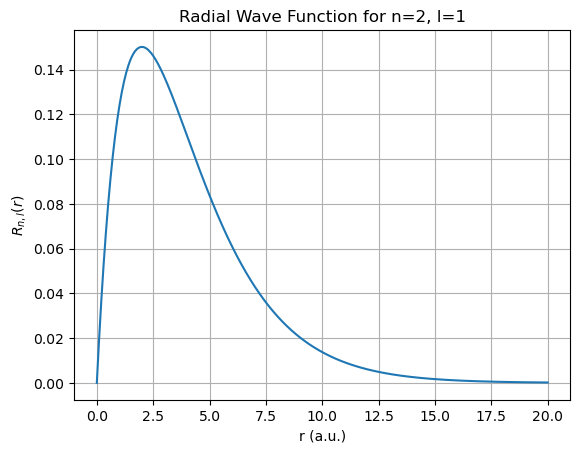

In [6]:
plot_radial_wavefunction(2, 1)

### The Angular Wavefunction

The angular part of the wavefunction is dependent on the two quantum numbers $l$ and $m$, as well as the two angles $\theta$ and $\phi$. It is defined as
\begin{equation}
    Y_l^m(\theta, \phi) = N_{l,m}P_l^m\left(\cos{\theta}\right)\mathrm{e}^{im\phi}, \tag{7}
\end{equation}
containing the normalization factor $N_{l,m}$ and an associated Legendre polynomial $P_l^m$,
\begin{equation}
N_{l,m} = \sqrt{\frac{(2l + 1)(l - m)!}{4\pi(l + m)!}} \tag{8}
\end{equation}
and
\begin{equation}
    P_l^m(x) = \left(-1\right)^m \left(1 - x^2\right)^{m/2} \frac{\mathrm{d}^m}{\mathrm{d}x^m} P_l(x) \tag{9}
\end{equation}
with
\begin{equation}
    P_n(x) = \frac{1}{2^nn!} \frac{\mathrm{d}^n}{\mathrm{d}x^n} \left(x^2 - 1\right)^n. \tag{10}
\end{equation}


### Exercise 2

Plot the angular wavefunction for different values of $l$ and $m$ using the equations above.

Hint: use `scipy.special.factorial` and `scipy.special.lpmv` to obtain factorials and associated Legendre polynomials, respectively.

Two functions are provided to plot the angular wavefunction: `plot_shape()` plots the "shape" of the orbitals, while `plot_sphere()` plots the angular wavefunction on a unit sphere as a colormap. Both need the probability density (either `Y.real**2` or `Y.imag**2`) as an input.

Also try plotting the "true" probablity density of the p orbital ($(\Re\{p_x\})^2 + (\Im\{p_y\})^2$).

In [ ]:
def normalization_constantN(l, m):
    N = np.sqrt(((2 * l + 1) * (scipy.special.factorial(l - m))) / (4 * np.pi * scipy.special.factorial(l + m)))
    return N

def angular(l, m, theta, phi):
    P_lm = scipy.special.lpmv(m, l, np.cos(theta))
    Y_lm = normalization_constantN(l, m) * P_lm * np.exp(1j * m * phi)
    return Y_lm

def map_angular_to_cartesian(WF, theta, phi):
    x = WF * np.sin(theta) * np.cos(phi)
    y = WF * np.sin(theta) * np.sin(phi)
    z = WF * np.cos(theta)
    return x, y, z

def plot_shape(dens, theta, phi):
    x, y, z = map_angular_to_cartesian(dens, theta, phi)

    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(np.sqrt(x**2 + y**2 + z**2) / np.max(np.sqrt(x**2 + y**2 + z**2))), rstride=1, cstride=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_sphere(dens, theta, phi):
    r = 1
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    func = np.sqrt((dens - np.min(dens)) / (np.max(dens) - np.min(dens)))
    ax.plot_surface(x, y, z, facecolors=plt.cm.jet(func), rstride=1, cstride=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

(200, 200) (200, 200)


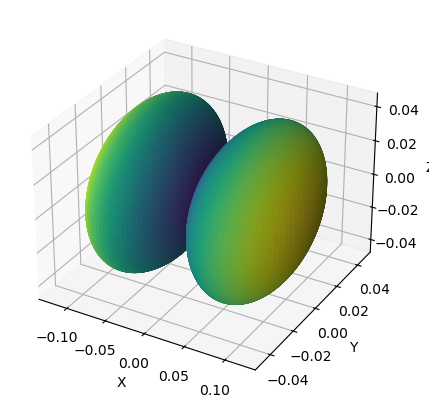

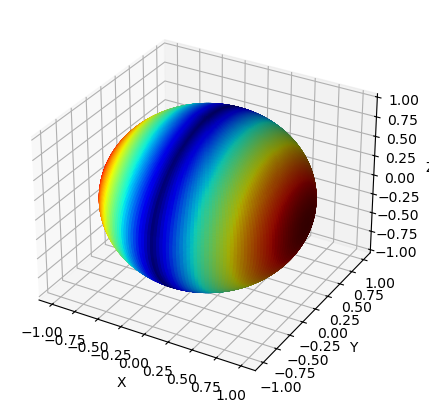

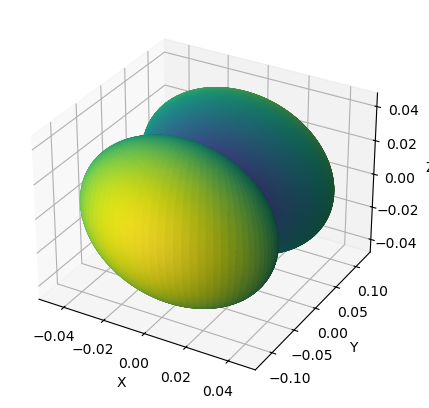

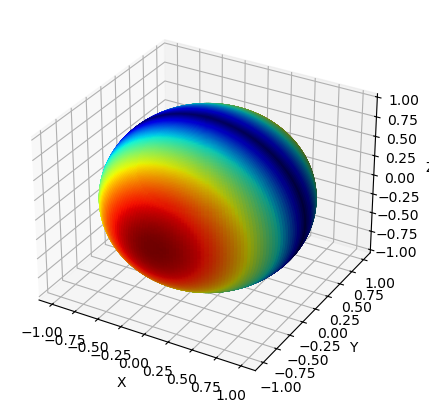

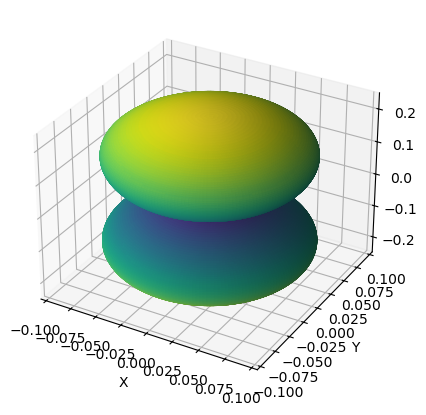

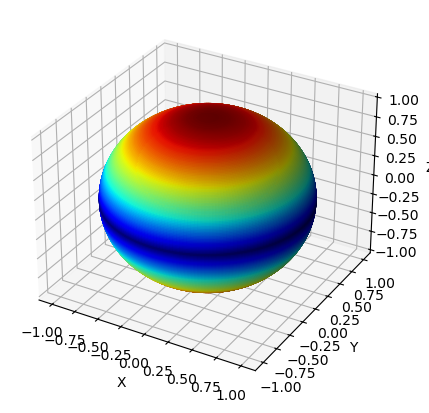

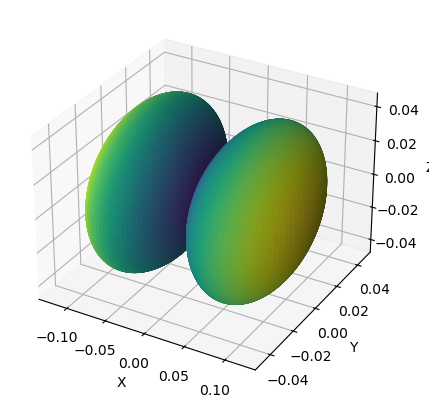

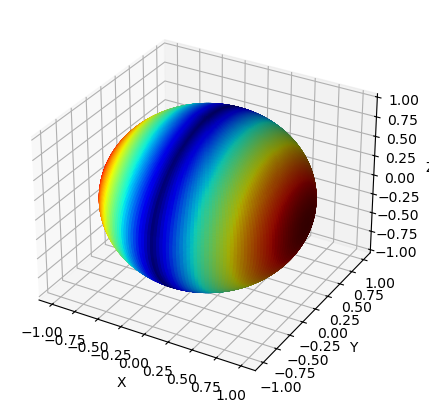

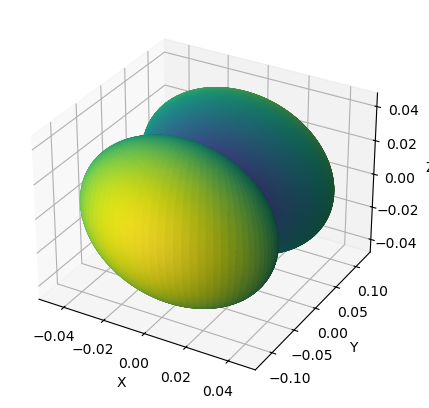

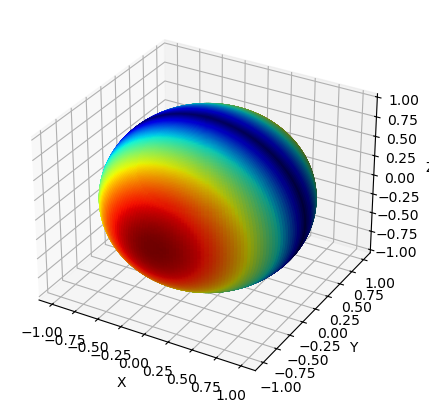

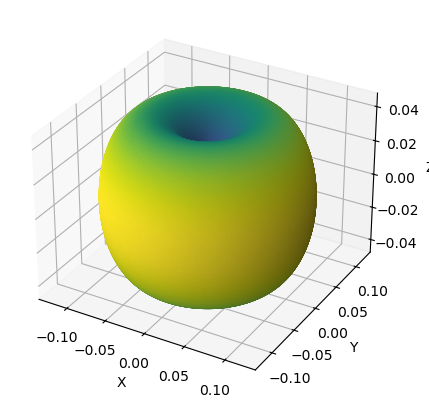

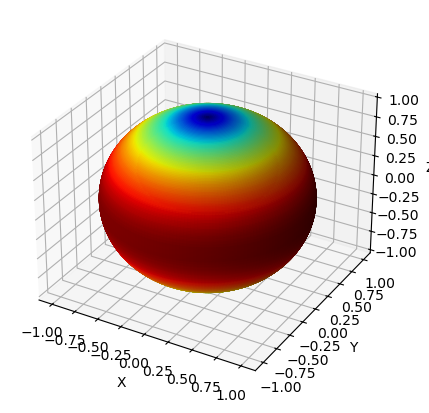

In [ ]:
theta = np.linspace(0, np.pi, 200)
phi   = np.linspace(0, 2 * np.pi, 200)
Theta, Phi = np.meshgrid(theta, phi)
print(Theta.shape, Phi.shape)

l = 1
m = [i for i in range(-l, l + 1)]
for mi in m:
    Y = angular(l, mi, Theta, Phi)
    plot_shape((Y.real)**2, Theta, Phi)
    plot_sphere((Y.real)**2, Theta, Phi)
    if mi != 0:
        plot_shape((Y.imag)**2, Theta, Phi)
        plot_sphere((Y.imag)**2, Theta, Phi)

pX = angular(1, 1, Theta, Phi)
pY = angular(1, -1, Theta, Phi)
true_p = pX.real**2 + pY.imag**2
plot_shape(true_p, Theta, Phi)
plot_sphere(true_p, Theta, Phi)

## WIP: The Full Wavefunction

In [ ]:
def wavefunction(n, l, m, r, theta, phi):
    R = radial(n, l, r)
    Y = angular(l, m, theta, phi)
    psi = R * Y
    return psi

def map_to_cartesian(WF, r, theta, phi):
    x = WF * r * np.sin(theta) * np.cos(phi)
    y = WF * r * np.sin(theta) * np.sin(phi)
    z = WF * r * np.cos(theta)
    return x, y, z

def plot_full_wavefunction_cartesian(n, l, m, rmax=20, nr=50, ntheta=50, nphi=100):
    r = np.linspace(0, rmax, nr)
    theta = np.linspace(0, np.pi, ntheta)
    phi = np.linspace(0, 2*np.pi, nphi)
    R, Theta, Phi = np.meshgrid(r, theta, phi, indexing='ij')
    Psi = wavefunction(n, l, m, R, Theta, Phi)

    x, y, z = map_to_cartesian(Psi.real**2, R, Theta, Phi)
    print(x.shape, y.shape, z.shape)

    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x, y, z, cmap='coolwarm', s=2, depthshade=False)
    ax1.set_title(f'Real-component geometry (n={n},l={l},m={m}) — colour=Re(Ψ)')
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')

    pX = wavefunction(n, l, 1, R, Theta, Phi)
    pY = wavefunction(n, l, -1, R, Theta, Phi)
    pZ = wavefunction(n, l, 0, R, Theta, Phi)
    p_true = pX.real**2 + pY.imag**2
    x, y, z = map_to_cartesian(p_true, R, Theta, Phi)

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x, y, z, cmap='coolwarm', s=2, depthshade=False)
    ax2.set_title(f'Imag-component geometry (n={n},l={l},m={m}) — colour=Im(Ψ)')
    ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_wavefunction(1, 0, 0)
plot_full_wavefunction_cartesian(2, 1, 0)